# Tensorflow - MNIST Dataset with Multilayer Perceptron

**dataset: MNIST**

**MNIST dataset is a collection of arrays representing hand written digits (0-9) using pixels.**

Exploring how Tensorflow can be used to help classifying what number is written simply by training on the array values.

In [8]:
import tensorflow as tf

In [9]:
print(tf.__version__)

1.13.1


## Getting the data

In [10]:
from tensorflow.examples.tutorials.mnist import input_data

In [11]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


**Alternative sources of the data where the dataset is available for download:**

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

#### checking the type of *minst*:

In [12]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

#### exploring the dataset:

In [13]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
mnist.train.images.shape

(55000, 784)

The result means:
* 55000 images
* 784 pixels per image

In [15]:
# confirming the number of example images in train set
mnist.train.num_examples

55000

In [16]:
# checking the number of example images in test set
mnist.test.num_examples

10000

In [17]:
# number of validation examples
mnist.validation.num_examples

5000

## Data Visualization

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#### grabbing the first image: 

In [19]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
# checking the shape of that immage
mnist.train.images[1].shape

(784,)

This image is of 784 pixel values.

**The original shape of mnist dataset arrays is 28x28. Thus, I have to transform the above to this shape:**

It can be seen that 28 x 28 = 784, or the square root of 784 is the 28 value.

In [21]:
mnist.train.images[1].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### plotting that array:

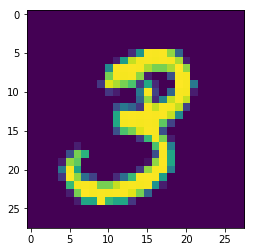

In [22]:
plt.imshow(mnist.train.images[1].reshape(28, 28))

Here, there are pixels values for the actual representation of the digit that is handwritten.

* 0 --> the darkest shape
* 1 --> the lightest shape

#### visualizing in grey scale:

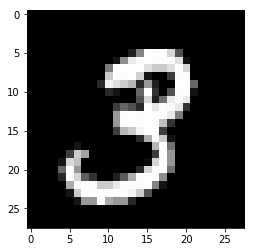

In [24]:
plt.imshow(mnist.train.images[1].reshape(28, 28), cmap='gist_gray')

*However, the input of that image to the neural network will be more cloese to the original shape (784,), i.e. a vector of numbers, and not the transformed one (28, 28)*.

#### visualizing the original shape (784, 1):

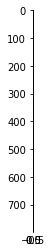

In [25]:
plt.imshow(mnist.train.images[1].reshape(784,1))

Here I take a really long vector. It is difficult to be visualized because there are only single values here.

#### However, changing the aspect, there is a better way of visualization, by stretching out the vector (i.e., adding width to the value points):

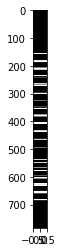

In [26]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

## Creating the Tensorflow Model

#### creating a placeholder (i.e. the training data):

The data type of the array values, is float numbers

The shape, is the actual shape I 'm expecting to be passen in.

There are going to be passed 55000 images. That's too many images to passen at once. So I need to break them up into batches. Later, there will be taken a decision about the optimal batch size.

* shape: None --> It's a semi-placeholder as the batch size is not defined yet
* shape: 784 --> I know the actual shape along the vector

In [27]:
x = tf.placeholder(dtype=tf.float32, shape=(None, 784))

i.e. sending certain batch amounts in the shape of 784 pixels at a time

#### defining the weights:

starting these off as zeros, with a shape of:
* 784 pixels
* 10 possible numbers: 0 1 2 3 4 5 6 7 8 9 (i.e. 10 possible target labels/classes)

In [28]:
W = tf.Variable(tf.zeros(shape=[784, 10]))

Instructions for updating:
Colocations handled automatically by placer.


#### defining the biases:

Adding bias by actually adding (not multiplying) one value per class. Thus, adding *10* here.

*by theory: Perceptron --> X * Weight + bias*

In [29]:
b = tf.Variable(tf.zeros([10]))

Note: By matrix theory, for matrices multiplication, the second dimension of the first matrix (X) is equal to the first dimension of th second matrix (W). Also, the variable of *b* matches up with the second dimension of W.

### Creating the Graph:

**y: the labels that will be predicted by the model**

by theory: Perceptron --> X * Weight + bias

In [31]:
y = tf.matmul(x,W) + b

### Finding Loss and Optimizer:

#### passing the correct/true labels to this variable:

* None: the label for the batch (some particular batch size)
* 10: 10 possible values, all 0, except one of them that will be 1.

In [32]:
y_true = tf.placeholder(dtype=tf.float32, shape=[None, 10])

Here is why *one_hot=True* was put at the beginning, where the dataset was loaed. That means that the actual target/label is **one hot encoded**. E.g.:

In [33]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**one hot encoded:** each of these index positions stands for the actual number it represents. For example:

0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

is actual the indexes of

0, 1, 2, 3, 4, 5, 6, 7, 8, 9

Here, the number that is represented is the **7**.

*Based on the previous example, where digit **3** is visualized, the label is the:*

In [36]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

It's actually pointed to index 3!!

#### Cross entropy:

The gradient that sets the optimizer and then minimizing the error.

Cross entropy is a kind of a fancy way of saying the actual error.

In [37]:
# reducing the error between the true values and that are predicted: how you're actually defining the error
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [38]:
# optimizing: optimizer is the method of how you are trying to reduce the error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

The lower the learning rate that means the slower it ends up learning. But usually, that increases the accuracy at the cost the time of training.

The faster the learning rate the less time will take actually the neural network to be trained. But it may be less accurate.

In [39]:
# train: grab that optimizer and minimize that particular error
train = optimizer.minimize(cross_entropy)

### Creating and Running the session

#### initializing all variables above that will be called when running or doing a session:

So basically everything is kind of a static graph until you actually tell it to run.

In [40]:
init = tf.global_variables_initializer()

#### running the session to perform the Operations:

In [42]:
with tf.Session() as sess:
    sess.run(init)  # running the initializers (everything will be initialized)
    
    # Train the model for 1000 steps on the training set (how many times I want to feed the various batches in)
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        # this mnist object has a built-in method for training batches, the next_batch()
        # the real-world datasets do not have this convenient training method
        # grabbing a batch of 100 numbers and then grab their x values and then grab their white target labels
        batch_x , batch_y = mnist.train.next_batch(100)
        
        # running train by calling also the feed dictionary that contains the actual values for x and y
        # the x and y_true are the related placeholders that were initialized above
        # they are placeholders until you actually pass it in with a dictionary.
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
        
    # Testing the Train Model
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    # Calculating accuracy
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    # Printing accuracy
    print('Model Accuracy:', sess.run(accuracy, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

Model Accuracy: 0.9184
